# Project Description

We are working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. The task is to find patterns in the available information. We want to understand passenger preferences and the impact of external factors on rides.
We are going study a database, analyze data from competitors, and test a hypothesis about the impact of weather on ride frequency.
We have already worked on the database with the help of SQL to
- find the number of taxi rides for each taxi company for November 15-16, 2017.
- find the number of rides for every taxi company whose name contains the words "Yellow" or "Blue" for November 1-7, 2017
- find the number of rides for Flash Cab and Taxi Affiliation Services and the remaining other taxi companies
- also for each hour, retrieved the weather condition records from the weather_records table

Now using Python we are going to identify the top 10 neighborhoods in terms of drop-offs and also we are going to test the hypothesis:
The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

Here we have three dataframes - taxi, travel and weather.

taxi contains the following data:
- company_name: taxi company name
- trips_amount: the number of rides for each taxi company on November 15-16, 2017.

travel contains the follwing data:
- dropoff_location_name: Chicago neighborhoods where rides ended
- average_trips: the average number of rides that ended in each neighborhood in November 2017.

weather contains the following data:
- start_ts - pickup date and time
- weather_conditions - weather conditions at the moment the ride started
- duration_seconds - ride duration in seconds

## Importing libraries and data files

In [5]:
from matplotlib import pyplot

import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from functools import reduce

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#importing files 
taxi = pd.read_csv('/datasets/project_sql_result_01.csv')
travel = pd.read_csv('/datasets/project_sql_result_04.csv')
weather = pd.read_csv('/datasets/project_sql_result_07.csv')

#studying the general information 
print('Taxi details')
print('\nDescription')
print(taxi.describe())
print('\nDatatypes')
print(taxi.info()) #checking for datatypes
print('\nHead')
print(taxi.head())
print('\nDuplicated Values')
print(taxi.duplicated().sum()) #checking for duplicated values
print('\nNull Values')
print(taxi.isnull().sum()*100/len(taxi)) #checking for null values
print('\nSkewness')
print(taxi.skew()) #checking for skewness

print('\n\nTravel details')
print('\nDescription')
print(travel.describe())
print('\nDatatypes')
print(travel.info()) #checking for datatypes
print('\nHead')
print(travel.head())
print('\nDuplicated Values')
print(travel.duplicated().sum())#checking for duplicated values
print('\nNull Values')
print(travel.isnull().sum()*100/len(taxi))#checking for null values
print('\nSkewness')
print(travel.skew()) #checking for skewness


print('\n\nWeather details')
print('\nDescription')
print(weather.describe())
print('\nDatatypes')
print(weather.info()) #checking for datatypes
print('\nHead')
print(weather.head())
print('\nDuplicated Values')
print(weather.duplicated().sum())#checking for duplicated values
print('\nNull Values')
print(weather.isnull().sum()*100/len(taxi))#checking for null values
print('\nSkewness')
print(weather.skew()) #checking for skewness


Taxi details

Description
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000

Datatypes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

Head
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

Duplicated Values
0

Null Values
company_name    0.0
trips_amount    0.0
dtype: float64

Skewness
trips_amount    2.404351
dtype: float64


Travel details

Description
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min 

### Conclusion

- Here we see that none of the dataframes have any null values. 
- But when checked for the datatypes we can see that `start_ts`has a datatype of string, we will be changing that to date 
- We checked for the duplicates using .duplicated().sum() method and found that they were none
- All the dataframes are skewed, we will be keeping that in mind when testing the hypothesis

## Exploratory data analysis 

#### Plot graph for top 10 neighbourhoods by number of dropoffs

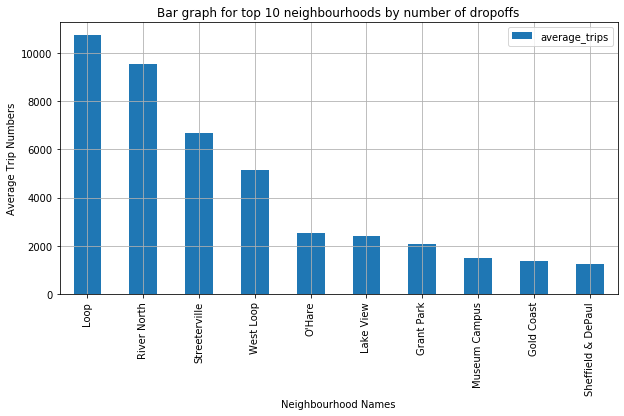

In [15]:
#changing the datatype of weather
weather['start_ts'] = pd.to_datetime(weather['start_ts'] , format='%Y.%m.%d %H:%M:%S')

#identifying the top neighbourhoods in terms of drop=offs
travel_top10 = travel.sort_values(by='average_trips',ascending=False).head(10)
#print(travel_top10.head(10))

#Bar graph for top 10 neighbourhoods by number of dropoffs
travel_top10_plot = travel_top10.set_index('dropoff_location_name').plot(kind = 'bar',figsize=(10,5), grid = True)
travel_top10_plot.set_title("Bar graph for top 10 neighbourhoods by number of dropoffs")
travel_top10_plot.set_xlabel("Neighbourhood Names")
travel_top10_plot.set_ylabel("Average Trip Numbers")
pyplot.show()




#### Plot graph for top 30 cab companies by number of trips

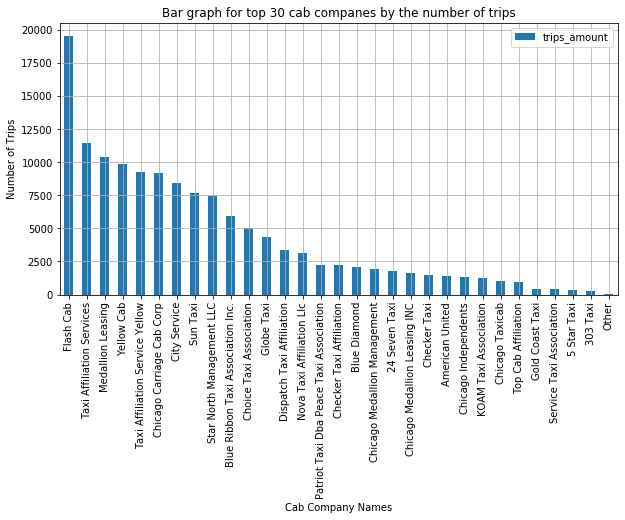

In [16]:
#selecting top 30 taxi companies and grouping the remaining into Others
taxi_sort = taxi.sort_values(by='trips_amount',ascending=False)
taxi_top31 = taxi_sort.head(30)
other_taxi = taxi_sort.tail(34)
other_taxi_avg = other_taxi.trips_amount.mean()
taxi_top31.loc[len(taxi_top31.index)] = ['Other',0]
taxi_top31.loc[30,'trips_amount'] = other_taxi_avg
#print(taxi_top31)

#Bar graph for top 30 cab companies by number of trips
taxi_top31_plot = taxi_top31.set_index('company_name').plot(kind = 'bar', grid = True, figsize=(10,5))
taxi_top31_plot.set_title("Bar graph for top 30 cab companes by the number of trips")
taxi_top31_plot.set_xlabel("Cab Company Names")
taxi_top31_plot.set_ylabel("Number of Trips")
pyplot.show()

### Conclusion

- Here I have combined the last 34 taxi companies into Other category as it will be easier to study the graph, rather than having all the 64 cab companies' name.
- From the above graphs we can see that Loop and River North are the neighbourhoods with the most drop-offs. Probably that is because these two areas are the most sought after areas in Chicago, Loop being the central business district. It's convenient to the museums and Millenium Park. River North is nearby, just on the other side of the Chicago River. There are more restaurants and bars in River North plus good transit which is why it's usually recommended for first-time visitors. That explains the high number of taxi drop-offs.
- And from the second graph - we see that the Flash Cabs is the company with highest number of trips. I believe the reason is that Flash cab offers corporate accounts apart from other common minimum facilities, therefore it explains why Loop has the highest number of drop-offs.

## Testing hypotheses 

We start with the null hypothesis H₀ : "The average duration of rides from the Loop to O'Hare International Airport don't change on rainy Saturdays." The alternative hypothesis, H₁, is based on H₀. For this H₀, H₁ would be, "The average duration of rides from the Loop to O'Hare International Airport change on rainy Saturdays."

In [4]:
#Selecting all Saturdays
filtered_df = weather.loc[weather['start_ts'].dt.weekday == 5]

#Selecting two samples based on the weather_conditions
bad_weather = filtered_df.query("weather_conditions=='Bad'")
good_weather = filtered_df.query("weather_conditions=='Good'") 

# Shapiro-Wilk Test for bad_weather start_ts
stat, p = shapiro(bad_weather.start_ts)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
 
# Shapiro-Wilk Test for good_weather start_ts
stat, p = shapiro(good_weather.start_ts)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

    


print("\n\n Mann-Whitney U test" ) 
stat, p = mannwhitneyu(bad_weather.start_ts, good_weather.start_ts)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
    


Statistics=0.644, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.818, p=0.000
Sample does not look Gaussian (reject H0)


 Mann-Whitney U test
Statistics=62439.000, p=0.000
Different distribution (reject H0)


### Conclusion 

- With the help of the Shapiro-Wilk Normality Test output we can see that the test statistic for checking if good weather and bad weather data follow the Normal Distribution. Since the p-value is less than .05, we can reject the null hypothesis. We have sufficient evidence to say that the sample data does not come from a normal distribution.
- Since we arrived at the conclusion that the data might not be a Normal Gaussian distribution and the both the samples are not paired - we went for Mann Whitney test from which we can make the assumption that - The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.


# Overall Conclusion

- We can conclude that most people prefer Flash Cab and Taxi Affiliation Services to hitch a ride and people generally like to visit the Loop or River North, as one is commercial and business spot and the other being tourist spot.
- Secondly now we have a clear picture to make the assumption that the average duration of rides from Loop to O'Hare Airport changes for both good and bad weather. It does make sense because in bad weather people are mindful of the traffic and roads when driving, as there will be visibility issues and roads can also slippery. 

Thank you so much!